In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def loadFile(name):
    data=pd.read_csv(name,sep="\t")
    data["H"]=np.round(data["B_extx (T)"]*10000/(np.sqrt(2)/2))
    data["m_full"]=(data["m_fullx (A/m)"]+data["m_fully (A/m)"])/np.sqrt(2) #Projection onto (1,1) vector


    data["m"]=data["m_full"]/np.max(np.abs(data["m_full"]))

    try: 
        data["hIsland_my"]=data["m_full.region1y (A/m)"]/np.max(np.sqrt(data["m_full.region1y (A/m)"]**2+data["m_full.region1x (A/m)"]**2))
    except Exception:
        pass
    

    data=data.drop(columns=["# t (s)",\
    "mz ()","mx ()", "my ()",\
    "B_extx (T)", "B_exty (T)","B_extz (T)",\
    "m_fullz (A/m)","m_fullx (A/m)","m_fully (A/m)",\
    "m_full.region1x (A/m)","m_full.region1y (A/m)","m_full.region1z (A/m)",\
    "m_full.region2x (A/m)","m_full.region2y (A/m)","m_full.region2z (A/m)"])

    try:
        data.attrs["Hc"]=np.average(np.abs(data[np.sign(data["m"]).diff() != 0]["H"].iloc[1:]))
        data.attrs["Br"]=np.average(np.abs(data[np.sign(data["H"]).diff() != 0]["m"].iloc[1:]))
    except Exception:
        pass

    data=data.sort_values("H")
    return data

max1000=loadFile("1000Max.out/table.txt")
max10000=loadFile("10000Max.out/table.txt")
max1000

,H,m_full,m,hIsland_my
999,-998.0,-165126.071630,-0.999835,-0.367996
998,-996.0,-165099.845039,-0.999677,-0.367665
997,-994.0,-165073.204791,-0.999515,-0.367330
996,-992.0,-165046.677680,-0.999355,-0.366996
995,-990.0,-165020.161176,-0.999194,-0.366663
...,...,...,...,...
4,992.0,165048.190889,0.999364,0.367021
3,994.0,165074.926596,0.999526,0.367357
2,996.0,165101.421887,0.999686,0.367691
1,998.0,165127.768686,0.999846,0.368023


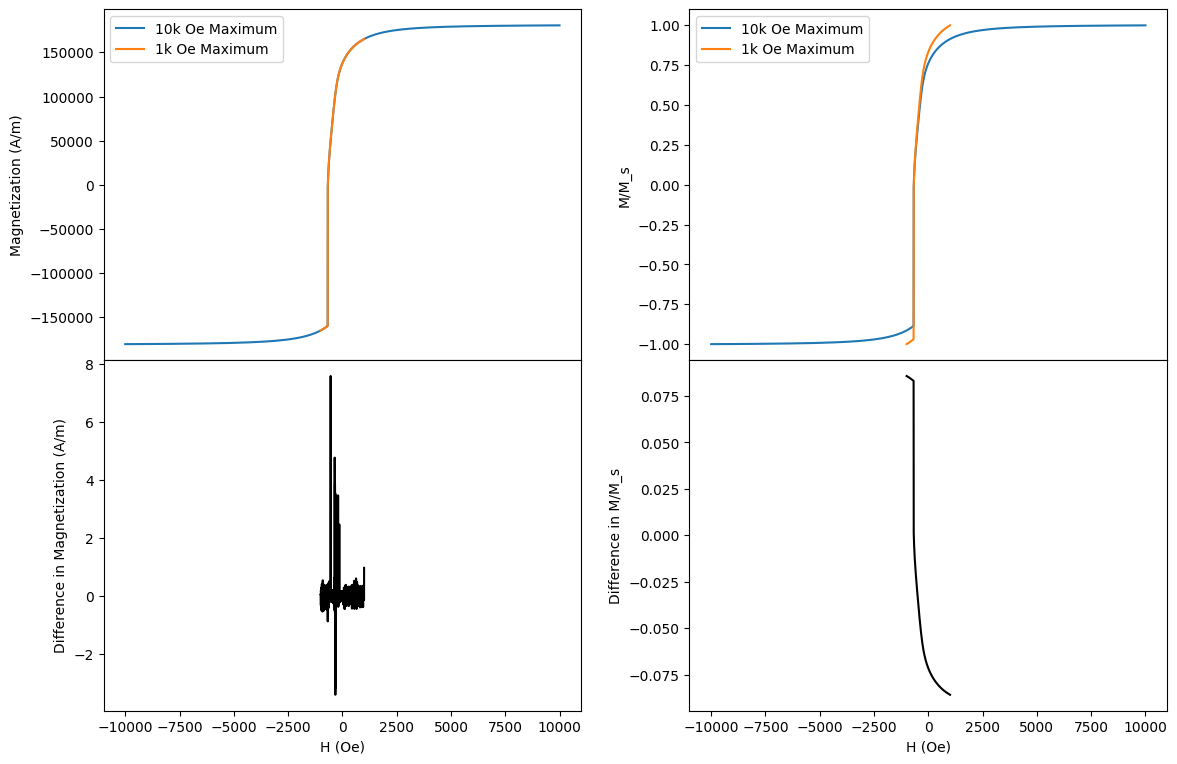

In [103]:

fig,((ax1,ax3),(ax2,ax4))=plt.subplots(2,2,sharex=True)
fig.tight_layout()
fig.subplots_adjust(hspace=0)
fig.set_size_inches(12,8)

both=max10000.merge(max1000,on="H",how="inner",suffixes=["10000","1000"])

ax1.plot(max10000["H"],max10000["m_full"],label="10k Oe Maximum")
ax1.plot(max1000["H"],max1000["m_full"],label="1k Oe Maximum")
ax1.legend()
ax1.set_xlabel("H (Oe)")
ax1.set_ylabel("Magnetization (A/m)")



ax2.plot(both["H"],both.m_full10000-both.m_full1000,color="k")
ax2.set_xlabel("H (Oe)")
ax2.set_ylabel("Difference in Magnetization (A/m)")


ax3.plot(max10000["H"],max10000["m"],label="10k Oe Maximum")
ax3.plot(max1000["H"],max1000["m"],label="1k Oe Maximum")
ax3.legend()
ax3.set_xlabel("H (Oe)")
ax3.set_ylabel("M/M_s")

ax4.plot(both["H"],both.m10000-both.m1000,color="k")
ax4.set_xlabel("H (Oe)")
ax4.set_ylabel("Difference in M/M_s")
plt.savefig("out.png")
